In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 16,
     'axes.labelsize': 22,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
import sklearn
print ( sklearn.__version__ )

1.5.1


In [21]:
# Definindo os limites de x1 e x2
x1_min = 0.    # Limite inferior para x1
x1_max = 5.    # Limite superior para x1
x2_min = 0.    # Limite inferior para x2
x2_max = 5.    # Limite superior para x2

# Função para gerar um conjunto de dados
def create_dataset(n_data, p0, p1):
    # Função para separar as classes com base na reta p0 + p1 * x1
    def func_sep(X):
        return +1 if (X[1] >= p0 + p1 * X[0]) else 0  # Retorna 1 (classe positiva) se x2 >= p0 + p1 * x1, senão 0 (classe negativa)

    # Gerando dados aleatórios para x1 e x2 dentro dos limites definidos
    X = np.c_[
        x1_min + (x1_max - x1_min) * np.random.rand(n_data, 1),  # Gera n_data valores para x1 no intervalo [x1_min, x1_max]
        x2_min + (x2_max - x2_min) * np.random.rand(n_data, 1)   # Gera n_data valores para x2 no intervalo [x2_min, x2_max]
    ]

    # Aplicando a função de separação func_sep para gerar os rótulos (y) com base nas coordenadas X
    y = np.apply_along_axis(func_sep, 1, X).astype(np.int32)  # A função func_sep é aplicada linha por linha nos dados X

    # Retorna os dados de entrada X e os rótulos y
    return (X, y)

In [38]:
# Fixando a semente do gerador de números aleatórios para garantir a reprodutibilidade
np.random.seed(42)

# Definindo o número de dados a serem gerados
n_data = 50

# Definindo os parâmetros da reta para separação das classes
p0 = 3.0  # Intercepto da reta
p1 = -0.5  # Inclinação da reta

# Gerando o conjunto de dados de treinamento
X_train, y_train = create_dataset(n_data, p0, p1)  # Chama a função create_dataset para gerar X e y
# Criando um DataFrame com os dados de entrada X_train e os rótulos y_train
df_train = pd.DataFrame(np.c_[X_train, y_train], columns=("x1", "x2", "y_label")).astype({"y_label": "int32"})

# Mudando a semente para garantir que o conjunto de dados de teste seja diferente
np.random.seed(100)

# Gerando o conjunto de dados de teste com os mesmos parâmetros
X_test, y_test = create_dataset(n_data, p0, p1)  # Chama a função create_dataset para gerar X e y para o teste
# Criando um DataFrame com os dados de entrada X_test e os rótulos y_test
df_test = pd.DataFrame(np.c_[X_test, y_test], columns=("x1", "x2", "y_label")).astype({"y_label": "int32"})

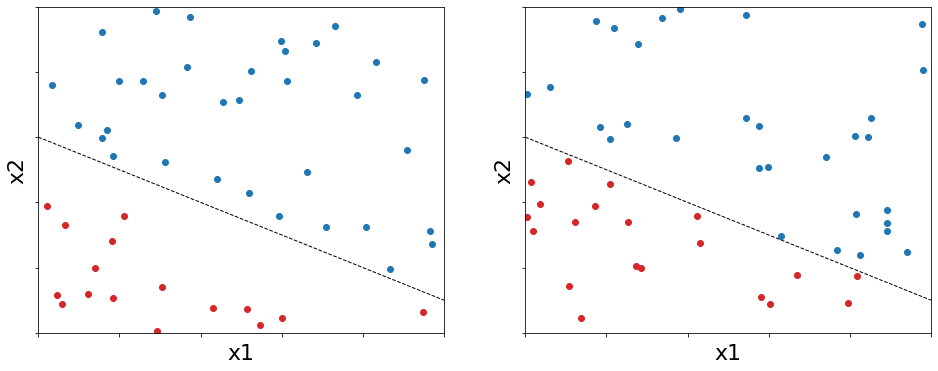

In [24]:
# Criando uma figura com 2 subgráficos (axes) lado a lado, com tamanho de 16x6 polegadas
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Selecionando os dados de sinal (y_label == +1) e fundo (y_label == 0) no conjunto de treinamento
msk_sig = (df_train["y_label"] == +1)  # Máscara para os dados de sinal
msk_bkg = (df_train["y_label"] == 0)  # Máscara para os dados de fundo

# Dividindo o DataFrame de treinamento em dados de sinal e fundo
df_train_sig = df_train[msk_sig]  # Dados de sinal
df_train_bkg = df_train[msk_bkg]  # Dados de fundo

# Plotando os dados de sinal (azul) e fundo (vermelho) no primeiro subgráfico (axes[0])
axes[0].plot(df_train_sig["x1"], df_train_sig["x2"], 'o', color='tab:blue')  # Dados de sinal em azul
axes[0].plot(df_train_bkg["x1"], df_train_bkg["x2"], 'o', color='tab:red')  # Dados de fundo em vermelho

# Adicionando uma linha preta (dashed) representando a reta de separação
axes[0].plot([x1_min, x1_max], [(p0 + p1 * x1_min), (p0 + p1 * x1_max)], linestyle='dashed', linewidth=1, color='black')

# Definindo os limites do eixo x e y para o gráfico
axes[0].set_xlim(x1_min, x1_max)  # Limite do eixo x
axes[0].set_ylim(x2_min, x2_max)  # Limite do eixo y
axes[0].set_xlabel(r'x1')  # Rótulo do eixo x
axes[0].set_ylabel(r'x2')  # Rótulo do eixo y

# Removendo os ticks dos eixos x e y
axes[0].xaxis.set_ticklabels([])  
axes[0].yaxis.set_ticklabels([])

# Selecionando os dados de sinal (y_label == +1) e fundo (y_label == 0) no conjunto de teste
msk_sig = (df_test["y_label"] == +1)  # Máscara para os dados de sinal
msk_bkg = (df_test["y_label"] == 0)  # Máscara para os dados de fundo

# Dividindo o DataFrame de teste em dados de sinal e fundo
df_test_sig = df_test[msk_sig]  # Dados de sinal
df_test_bkg = df_test[msk_bkg]  # Dados de fundo

# Plotando os dados de sinal (azul) e fundo (vermelho) no segundo subgráfico (axes[1])
axes[1].plot(df_test_sig["x1"], df_test_sig["x2"], 'o', color='tab:blue')  # Dados de sinal em azul
axes[1].plot(df_test_bkg["x1"], df_test_bkg["x2"], 'o', color='tab:red')  # Dados de fundo em vermelho

# Adicionando a linha preta (dashed) representando a reta de separação
axes[1].plot([x1_min, x1_max], [(p0 + p1 * x1_min), (p0 + p1 * x1_max)], linestyle='dashed', linewidth=1, color='black')

# Definindo os limites do eixo x e y para o gráfico
axes[1].set_xlim(x1_min, x1_max)  # Limite do eixo x
axes[1].set_ylim(x2_min, x2_max)  # Limite do eixo y
axes[1].set_xlabel(r'x1')  # Rótulo do eixo x
axes[1].set_ylabel(r'x2')  # Rótulo do eixo y

# Removendo os ticks dos eixos x e y
axes[1].xaxis.set_ticklabels([])  
axes[1].yaxis.set_ticklabels([])

# Exibindo o gráfico
plt.show()

In [25]:
from sklearn import linear_model
log_reg = linear_model.LogisticRegression()
log_reg.fit( df_train[ [ "x1", "x2" ] ], df_train[ "y_label" ] )

LogisticRegression()

In [26]:
print ( log_reg.coef_ )
print ( log_reg.intercept_ )

y_predict_proba_train = log_reg.predict_proba( df_train[ [ "x1", "x2" ] ] )
df_train[ "y_predict_proba" ] = y_predict_proba_train[ :, 1] # Prob. y = 1
df_train

[[1.03158336 2.29282517]]
[-5.74570857]


,x1,x2,y_label,y_predict_proba
0,1.872701,4.847923,1,0.999326
1,4.753572,3.875664,1,0.999679
2,3.659970,4.697495,1,0.999849
3,2.993292,4.474137,1,0.999500
4,0.780093,2.989500,1,0.871403
5,0.779973,4.609371,1,0.996415
6,0.290418,0.442463,0,0.011755
7,4.330881,0.979914,1,0.724866
8,3.005575,0.226136,0,0.106527
9,3.540363,1.626652,1,0.837003


Text(0, 0.5, 'Número de ocorrências')

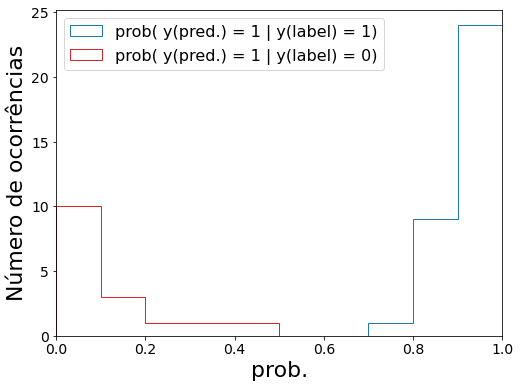

In [27]:
# Criando máscaras para os dados de sinal (y_label == +1) e fundo (y_label == 0) no conjunto de treinamento
msk_sig = (df_train["y_label"] == +1)  # Máscara para os dados de sinal
msk_bkg = (df_train["y_label"] == 0)  # Máscara para os dados de fundo

# Criando a figura para o gráfico de histogramas
fig = plt.figure(figsize=(8, 6))

# Plotando o histograma para as probabilidades preditas de sinal (y = 1) no conjunto de treinamento
# `y_predict_proba_train[msk_sig][:, 1]` extrai as probabilidades previstas para a classe 1 (y = 1) para os dados de sinal
plt.hist(y_predict_proba_train[msk_sig][:, 1], histtype='step', color="tab:blue", 
         label="prob( y(pred.) = 1 | y(label) = 1)", bins=10, range=(0., 1.))

# Plotando o histograma para as probabilidades preditas de sinal (y = 1) no conjunto de treinamento para os dados de fundo
# `y_predict_proba_train[msk_bkg][:, 1]` extrai as probabilidades previstas para a classe 1 (y = 1) para os dados de fundo
plt.hist(y_predict_proba_train[msk_bkg][:, 1], histtype='step', color="tab:red", 
         label="prob( y(pred.) = 1 | y(label) = 0)", bins=10, range=(0., 1.))

# Adicionando a legenda no canto superior esquerdo
plt.legend(loc='upper left')

# Ajustando o limite do eixo x para variar de 0 a 1, pois estamos lidando com probabilidades
plt.xlim(0., 1.)

# Adicionando rótulos aos eixos
plt.xlabel("prob.")  # Rótulo para o eixo x
plt.ylabel("Número de ocorrências")  # Rótulo para o eixo y

/cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[Text(0, 0.0, ''),
 Text(0, 1.0, ''),
 Text(0, 2.0, ''),
 Text(0, 3.0, ''),
 Text(0, 4.0, ''),
 Text(0, 5.0, '')]

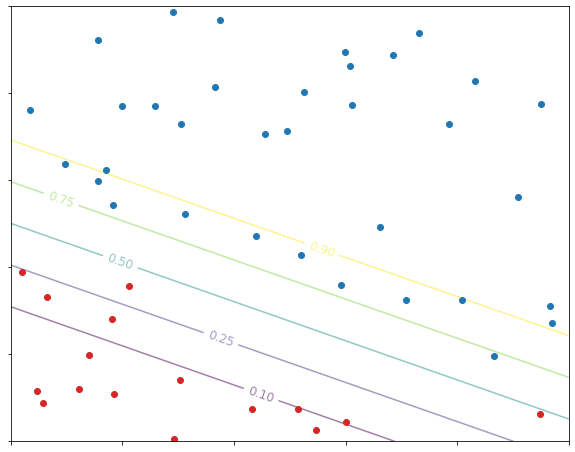

In [28]:
# Criando a figura para o gráfico de contornos
fig = plt.figure(figsize=(10, 8))

# Definindo o número de pontos para a grade de varredura
n_points_ = 500

# Gerando os pontos para a variável x1 no intervalo [x1_min, x1_max]
data_x1_ = np.linspace(x1_min, x1_max, n_points_)[:, np.newaxis]

# Gerando os pontos para a variável x2 no intervalo [x1_min, x1_max] (usando o mesmo intervalo para x2)
data_x2_ = np.linspace(x1_min, x1_max, n_points_)[:, np.newaxis]

# Criando uma grade de pontos com meshgrid, para combinar os pontos de x1 e x2
grid_x1_, grid_x2_ = np.meshgrid(data_x1_, data_x2_)

# Combinando as duas grades em um único array de pontos para varredura
datascan_ = np.c_[grid_x1_.ravel(), grid_x2_.ravel()]

# Obtendo as probabilidades de predição para a classe 1 (y = 1) para todos os pontos da grade
datascan_predict_ = (log_reg.predict_proba(datascan_))[:, 1].reshape(grid_x1_.shape)

# Plotando os contornos das probabilidades previstas para a classe 1, com níveis especificados (0.10, 0.25, 0.50, 0.75, 0.90)
contour_ = plt.contour(grid_x1_, grid_x2_, datascan_predict_, levels=[0.10, 0.25, 0.50, 0.75, 0.90], alpha=0.50)

# Adicionando rótulos aos contornos
plt.clabel(contour_, inline=1, fontsize=12)

# Selecionando os dados de sinal e fundo no conjunto de treinamento
msk_sig = (df_train["y_label"] == +1)  # Máscara para sinal
msk_bkg = (df_train["y_label"] == 0)  # Máscara para fundo

# Filtrando os dados de sinal e fundo
df_train_sig = df_train[msk_sig]
df_train_bkg = df_train[msk_bkg]

# Plotando os pontos de sinal (classe 1) como círculos azuis
plt.plot(df_train_sig["x1"], df_train_sig["x2"], 'o', color='tab:blue')

# Plotando os pontos de fundo (classe 0) como círculos vermelhos
plt.plot(df_train_bkg["x1"], df_train_bkg["x2"], 'o', color='tab:red')

# (Comentado) Linha de separação linear original (não necessária no gráfico final)
# plt.plot([x1_min, x1_max], [(p0 + p1 * x1_min), (p0 + p1 * x1_max)], linestyle='dashdot', linewidth=1, color='tab:red')

# Ajustando os limites dos eixos x e y para o intervalo especificado
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)

# Definindo rótulos para os eixos x e y
plt.xlabel(r'')  # Rótulo vazio para o eixo x
plt.ylabel(r'')  # Rótulo vazio para o eixo y

# Removendo os ticks (rótulos dos eixos) para uma aparência mais limpa
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticklabels([])

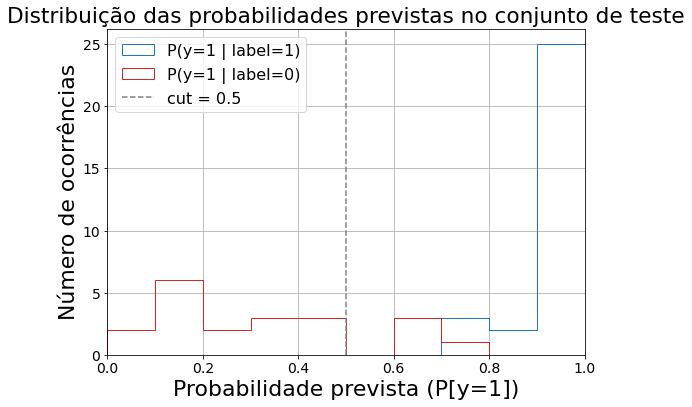

In [29]:
# Cálculo das probabilidades
y_predict_proba_test = log_reg.predict_proba(df_test[["x1", "x2"]])
df_test["y_predict_proba"] = y_predict_proba_test[:, 1]  # P(y=1)

# Máscaras para sinal e fundo
msk_sig = (df_test["y_label"] == 1)
msk_bkg = (df_test["y_label"] == 0)

# Figura
fig = plt.figure(figsize=(8, 6))
plt.hist(y_predict_proba_test[msk_sig][:, 1], 
         histtype='step', color="tab:blue", 
         label="P(y=1 | label=1)", bins=10, range=(0., 1.))
plt.hist(y_predict_proba_test[msk_bkg][:, 1], 
         histtype='step', color="tab:red", 
         label="P(y=1 | label=0)", bins=10, range=(0., 1.))

# Linha de corte
plt.axvline(0.5, linestyle='--', color='gray', label="cut = 0.5")

# Rótulos e ajustes
plt.legend(loc='upper left')
plt.xlim(0., 1.)
plt.xlabel("Probabilidade prevista (P[y=1])")
plt.ylabel("Número de ocorrências")
plt.title("Distribuição das probabilidades previstas no conjunto de teste")
plt.grid(True)
plt.tight_layout()
plt.show()

/cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Acurácia para corte 0.50 = 0.9200
Acurácia para corte 0.75 = 0.9800


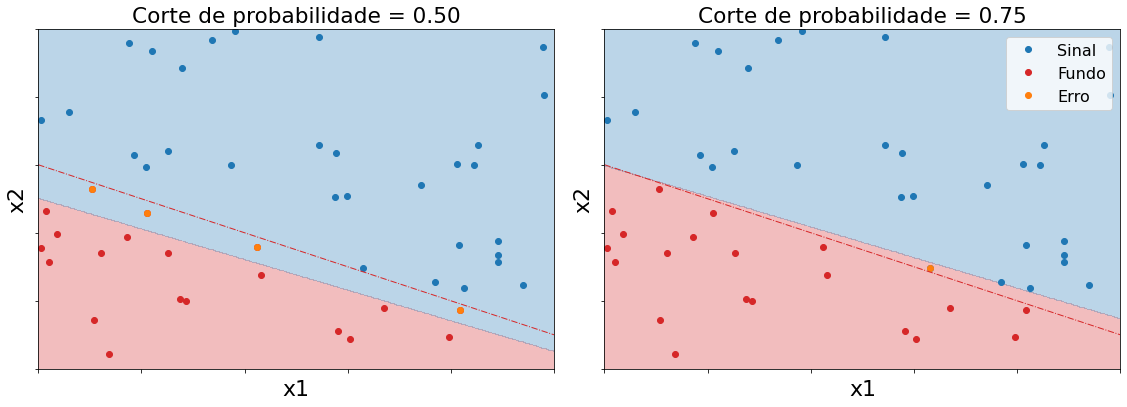

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Cria uma figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Lista de cortes de probabilidade para classificar como sinal (classe 1)
prob_cut_list = [0.50, 0.75]

# Loop para gerar gráficos para cada valor de corte
for idx_, prob_cut_ in enumerate(prob_cut_list):

    # Número de pontos na grade para o plot
    n_points_ = 500

    # Gera valores no intervalo de x1 e x2 para criar uma malha (grid)
    data_x1_ = np.linspace(x1_min, x1_max, n_points_)[:, np.newaxis]
    data_x2_ = np.linspace(x2_min, x2_max, n_points_)[:, np.newaxis]
    grid_x1_, grid_x2_ = np.meshgrid(data_x1_, data_x2_)

    # Cria array com todas as combinações de x1 e x2 no grid
    datascan_ = np.c_[grid_x1_.ravel(), grid_x2_.ravel()]

    # Calcula as probabilidades de predição para o grid e aplica o corte
    datascan_predict_ = (
        log_reg.predict_proba(datascan_)[:, 1] >= prob_cut_
    ).reshape(grid_x1_.shape)

    # Mapa de cores para fundo da região de decisão
    custom_cmap = ListedColormap(['tab:red', 'tab:blue'])

    # Plota a região de decisão (fundo azul = sinal, vermelho = fundo)
    axes[idx_].contourf(grid_x1_, grid_x2_, datascan_predict_, cmap=custom_cmap, alpha=0.3)

    # Aplica o corte de probabilidade aos dados de teste para classificar
    y_predict_test_ = (df_test["y_predict_proba"] >= prob_cut_).astype(int)

    # Cria máscaras para os diferentes tipos de eventos
    msk_sig_ = (df_test["y_label"] == 1)       # Eventos de sinal reais
    msk_bkg_ = (df_test["y_label"] == 0)       # Eventos de fundo reais
    msk_error_ = (df_test["y_label"] != y_predict_test_)  # Eventos mal classificados

    # Seleciona os dados com base nas máscaras
    df_test_sig_ = df_test[msk_sig_]
    df_test_bkg_ = df_test[msk_bkg_]
    df_test_error_ = df_test[msk_error_]

    # Plota os pontos classificados como sinal e fundo, e os erros
    axes[idx_].plot(df_test_sig_["x1"], df_test_sig_["x2"], 'o', color='tab:blue', label='Sinal')
    axes[idx_].plot(df_test_bkg_["x1"], df_test_bkg_["x2"], 'o', color='tab:red', label='Fundo')
    axes[idx_].plot(df_test_error_["x1"], df_test_error_["x2"], 'o', color='tab:orange', label='Erro')

    # (Opcional) reta da fronteira linear aprendida (caso tenha os coeficientes)
    axes[idx_].plot([x1_min, x1_max], [p0 + p1*x1_min, p0 + p1*x1_max], linestyle='dashdot', linewidth=1, color='tab:red')

    # Ajustes dos eixos e rótulos
    axes[idx_].set_xlim(x1_min, x1_max)
    axes[idx_].set_ylim(x2_min, x2_max)
    axes[idx_].set_xlabel("x1")
    axes[idx_].set_ylabel("x2")
    axes[idx_].xaxis.set_ticklabels([])
    axes[idx_].yaxis.set_ticklabels([])

    # Título indicando o valor de corte
    axes[idx_].set_title(f'Corte de probabilidade = {prob_cut_:.2f}')

    # Calcula e imprime a acurácia da predição para o corte atual
    accuracy = np.sum(df_test["y_label"] == y_predict_test_) / df_test.shape[0]
    print(f"Acurácia para corte {prob_cut_:.2f} = {accuracy:.4f}")

# Mostra a legenda (só será exibida no último subplot plotado)
axes[-1].legend(loc='upper right')

# Exibe os gráficos
plt.tight_layout()
plt.show()

## Adicionando Ruido nas amostras

In [31]:
def add_noise( X, sigma = 0.5 ):
    return ( X + sigma * np.random.randn( *(X.shape) ) )

In [32]:
# Define a semente do gerador de números aleatórios para reprodutibilidade
np.random.seed(42)

# Define o desvio padrão do ruído gaussiano que será adicionado aos dados
sigma = 0.5

# Aplica ruído aos dados de treino
X_train_noise = add_noise(X_train, sigma=sigma)

# Cria um DataFrame com os dados de treino ruidosos e suas respectivas classes
df_train_noise = pd.DataFrame(
    np.c_[X_train_noise, y_train],                    # Concatena as colunas x1, x2 e y_label
    columns=("x1", "x2", "y_label")                   # Define os nomes das colunas
).astype({ "y_label": "int32" })                      # Garante que y_label seja um inteiro

# Aplica ruído aos dados de teste
X_test_noise = add_noise(X_test, sigma=sigma)

# Cria um DataFrame com os dados de teste ruidosos e suas respectivas classes
df_test_noise = pd.DataFrame(
    np.c_[X_test_noise, y_test],                      # Concatena as colunas x1, x2 e y_label
    columns=("x1", "x2", "y_label")                   # Define os nomes das colunas
).astype({ "y_label": "int32" })                      # Garante que y_label seja um inteiro

[Text(0, 0.0, ''),
 Text(0, 1.0, ''),
 Text(0, 2.0, ''),
 Text(0, 3.0, ''),
 Text(0, 4.0, ''),
 Text(0, 5.0, '')]

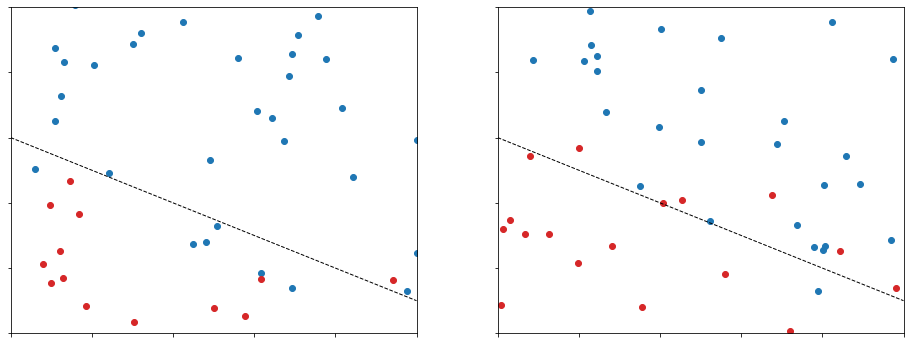

In [33]:
# Cria uma figura com 2 subplots lado a lado (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Usa o DataFrame de treino com ruído
df_train__ = df_train_noise

# Máscara para separar os eventos de sinal (y_label == +1)
msk_sig = (df_train__["y_label"] == +1)

# Máscara para separar os eventos de fundo (y_label == 0)
msk_bkg = (df_train__["y_label"] == 0)

# Aplica as máscaras para obter os DataFrames de sinal e fundo
df_train_sig = df_train__[msk_sig]
df_train_bkg = df_train__[msk_bkg]

# Plota os pontos de sinal no primeiro gráfico (eixo 0) com a cor azul
axes[0].plot(df_train_sig["x1"], df_train_sig["x2"], 'o', color='tab:blue')

# Plota os pontos de fundo no primeiro gráfico com a cor vermelha
axes[0].plot(df_train_bkg["x1"], df_train_bkg["x2"], 'o', color='tab:red')

# Plota a reta de separação linear (definida por p0 e p1)
axes[0].plot([x1_min, x1_max], [p0 + p1 * x1_min, p0 + p1 * x1_max], linestyle='dashed', linewidth=1, color='black')

# Define os limites dos eixos x e y para o primeiro gráfico
axes[0].set_xlim(x1_min, x1_max)
axes[0].set_ylim(x2_min, x2_max)

# Define rótulos dos eixos (vazios aqui, podem ser preenchidos depois)
axes[0].set_xlabel(r'')  
axes[0].set_ylabel(r'')

# Remove os números dos ticks (marcas nos eixos)
axes[0].xaxis.set_ticklabels([])
axes[0].yaxis.set_ticklabels([])

# Usa o DataFrame de teste com ruído
df_test__ = df_test_noise

# Máscaras para sinal e fundo no conjunto de teste
msk_sig = (df_test__["y_label"] == +1)
msk_bkg = (df_test__["y_label"] == 0)

# Aplica as máscaras para obter os DataFrames de teste com sinal e fundo
df_test_sig = df_test__[msk_sig]
df_test_bkg = df_test__[msk_bkg]

# Plota os pontos de sinal no segundo gráfico (eixo 1) com a cor azul
axes[1].plot(df_test_sig["x1"], df_test_sig["x2"], 'o', color='tab:blue')

# Plota os pontos de fundo no segundo gráfico com a cor vermelha
axes[1].plot(df_test_bkg["x1"], df_test_bkg["x2"], 'o', color='tab:red')

# Plota novamente a reta de separação linear
axes[1].plot([x1_min, x1_max], [p0 + p1 * x1_min, p0 + p1 * x1_max], linestyle='dashed', linewidth=1, color='black')

# Define os limites dos eixos x e y para o segundo gráfico
axes[1].set_xlim(x1_min, x1_max)
axes[1].set_ylim(x2_min, x2_max)

# Define rótulos dos eixos (vazios, podem ser completados conforme necessário)
axes[1].set_xlabel(r'')  
axes[1].set_ylabel(r'')

# Remove os números dos ticks (marcas nos eixos)
axes[1].xaxis.set_ticklabels([])
axes[1].yaxis.set_ticklabels([])

Text(0, 0.5, 'Número de ocorrências')

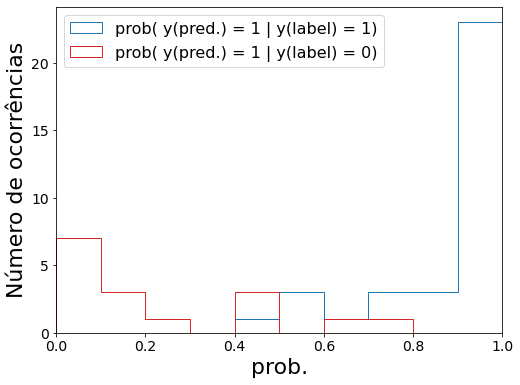

In [34]:
# Cria e treina um modelo de Regressão Logística com os dados de treino com ruído
log_reg_noise = linear_model.LogisticRegression()
log_reg_noise.fit(df_train_noise[["x1", "x2"]], df_train_noise["y_label"])

# Calcula as probabilidades preditas de cada classe (0 ou 1) no conjunto de treino
# A saída é uma matriz de duas colunas: probabilidade de y=0 e de y=1
y_predict_proba_train_noise = log_reg_noise.predict_proba(df_train_noise[["x1", "x2"]])

# Armazena a probabilidade de y=1 (segunda coluna) no DataFrame
df_train_noise["y_predict_proba"] = y_predict_proba_train_noise[:, 1]  # Probabilidade de ser classe 1 (sinal)

# Máscaras para separar os exemplos rotulados como sinal (+1) e fundo (0)
msk_sig = (df_train_noise["y_label"] == +1)
msk_bkg = (df_train_noise["y_label"] == 0)

# Cria uma nova figura para o histograma
fig = plt.figure(figsize=(8,6))

# Plota o histograma das probabilidades preditas para os eventos de sinal (y_label = 1)
plt.hist(
    y_predict_proba_train_noise[msk_sig][:, 1],           # Probabilidade predita de y=1, para eventos com y_label=1
    histtype='step',                                      # Apenas contorno do histograma
    color="tab:blue",                                     # Cor azul
    label="prob( y(pred.) = 1 | y(label) = 1)",           # Rótulo da legenda
    bins=10, range=(0.,1.)                                # 10 bins no intervalo [0,1]
)

# Plota o histograma das probabilidades preditas para os eventos de fundo (y_label = 0)
plt.hist(
    y_predict_proba_train_noise[msk_bkg][:, 1],           # Probabilidade predita de y=1, para eventos com y_label=0
    histtype='step',
    color="tab:red",
    label="prob( y(pred.) = 1 | y(label) = 0)",
    bins=10, range=(0.,1.)
)

# Exibe a legenda no canto superior esquerdo
plt.legend(loc='upper left')

# Define os limites do eixo x (probabilidade entre 0 e 1)
plt.xlim(0., 1.)

# Rótulos dos eixos x e y
plt.xlabel("prob.")
plt.ylabel("Número de ocorrências")

Text(0, 0.5, 'Número de ocorrências')

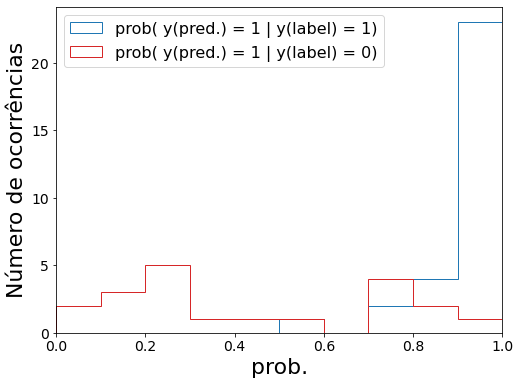

In [35]:
# Calcula as probabilidades preditas para o conjunto de teste com ruído
# A saída possui duas colunas: [P(y=0), P(y=1)]
y_predict_proba_test_noise = log_reg_noise.predict_proba(df_test_noise[["x1", "x2"]])

# Adiciona ao DataFrame a probabilidade de ser classe 1 (sinal)
df_test_noise["y_predict_proba"] = y_predict_proba_test_noise[:, 1]

# Cria máscaras para separar os eventos rotulados como sinal (+1) e fundo (0)
msk_sig = (df_test_noise["y_label"] == +1)
msk_bkg = (df_test_noise["y_label"] == 0)

# Cria uma nova figura para o histograma
fig = plt.figure(figsize=(8,6))

# Plota histograma da probabilidade predita de y=1 para os eventos de sinal
plt.hist(
    y_predict_proba_test_noise[msk_sig][:, 1],             # Probabilidades P(y=1) para rótulo real = 1
    histtype='step',                                       # Estilo de linha (contorno apenas)
    color="tab:blue",                                      # Cor azul
    label="prob( y(pred.) = 1 | y(label) = 1)",            # Rótulo para legenda
    bins=10, range=(0.,1.)                                 # Número de bins e intervalo
)

# Plota histograma da probabilidade predita de y=1 para os eventos de fundo
plt.hist(
    y_predict_proba_test_noise[msk_bkg][:, 1],             # Probabilidades P(y=1) para rótulo real = 0
    histtype='step',
    color="tab:red",
    label="prob( y(pred.) = 1 | y(label) = 0)",
    bins=10, range=(0.,1.)
)

# Adiciona legenda no canto superior esquerdo
plt.legend(loc='upper left')

# Limites do eixo x (probabilidades entre 0 e 1)
plt.xlim(0., 1.)

# Rótulos dos eixos
plt.xlabel("prob.")               # Eixo x: probabilidade predita
plt.ylabel("Número de ocorrências")  # Eixo y: número de eventos

/cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Accuracy (cut = 0.5): 0.840
Accuracy (cut = 0.75): 0.860


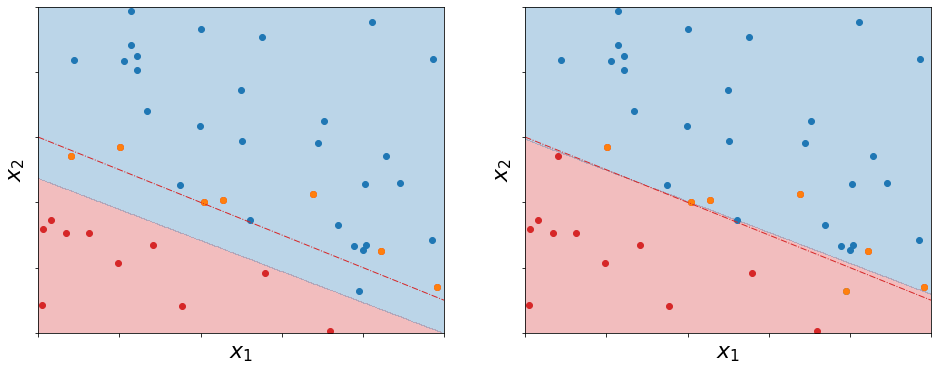

In [36]:
# Cria duas subfiguras lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Lista de cortes de probabilidade para classificar como sinal (P(y=1) >= corte)
prob_cut_list = [0.50, 0.75]

# Seleciona o classificador treinado e o conjunto de teste com ruído
log_reg__ = log_reg_noise
df_test__ = df_test_noise

# Loop sobre os diferentes valores de corte de probabilidade
for idx_, prob_cut_ in enumerate(prob_cut_list):

    # Cria uma malha bidimensional de pontos no plano (x1, x2)
    n_points_ = 500
    data_x1_ = np.linspace(x1_min, x1_max, n_points_)[:, np.newaxis]
    data_x2_ = np.linspace(x1_min, x1_max, n_points_)[:, np.newaxis]
    grid_x1_, grid_x2_ = np.meshgrid(data_x1_, data_x2_)
    datascan_ = np.c_[grid_x1_.ravel(), grid_x2_.ravel()]

    # Calcula a predição do modelo em cada ponto da malha com base no corte
    datascan_predict_ = (
        log_reg__.predict_proba(datascan_)[:, 1] >= prob_cut_
    ).reshape(grid_x1_.shape)

    # Define um colormap personalizado: fundo (vermelho), sinal (azul)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['tab:red', 'tab:blue'])

    # Plota o contorno das regiões de decisão
    axes[idx_].contourf(grid_x1_, grid_x2_, datascan_predict_, cmap=custom_cmap, alpha=0.30)

    # Classifica os dados reais do teste com o corte atual
    y_predict_test_ = np.full_like(df_test__["y_label"], -1)
    msk_ = (df_test__["y_predict_proba"] >= prob_cut_)
    y_predict_test_[msk_] = +1
    y_predict_test_[~msk_] = 0

    # Máscaras para sinal, fundo e erros de classificação
    msk_sig_ = (df_test__["y_label"] == +1)
    msk_bkg_ = (df_test__["y_label"] == 0)
    msk_error_ = (df_test__["y_label"] != y_predict_test_)

    # DataFrames para visualização
    df_test_sig_ = df_test__[msk_sig_]
    df_test_bkg_ = df_test__[msk_bkg_]
    df_test_error_ = df_test__[msk_error_]

    # Plota os eventos reais de sinal, fundo e erros
    axes[idx_].plot(df_test_sig_["x1"], df_test_sig_["x2"], 'o', color='tab:blue')
    axes[idx_].plot(df_test_bkg_["x1"], df_test_bkg_["x2"], 'o', color='tab:red')
    axes[idx_].plot(df_test_error_["x1"], df_test_error_["x2"], 'o', color='tab:orange')

    # Plota a reta de decisão da regressão logística (linha de decisão teórica com p=0.5)
    axes[idx_].plot(
        [x1_min, x1_max],
        [p0 + p1 * x1_min, p0 + p1 * x1_max],
        linestyle='dashdot', linewidth=1, color='tab:red'
    )

    # Configura os eixos
    axes[idx_].set_xlim(x1_min, x1_max)
    axes[idx_].set_ylim(x2_min, x2_max)
    axes[idx_].set_xlabel(r'$x_1$')
    axes[idx_].set_ylabel(r'$x_2$')
    axes[idx_].xaxis.set_ticklabels([])
    axes[idx_].yaxis.set_ticklabels([])

    # Calcula e imprime a acurácia do modelo para o corte atual
    accuracy = np.sum(df_test__["y_label"] == y_predict_test_) / df_test__.shape[0]
    print("Accuracy (cut = {}): {:.3f}".format(prob_cut_, accuracy))